### Deliverable 1: Preprocessing the Data for a Neural Network

In [1009]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [1010]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME","ASK_AMT"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [1011]:
# Determine the number of unique values in each column.
# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes=="object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [1012]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

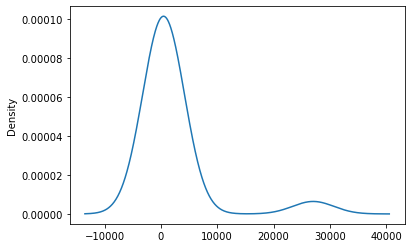

In [1013]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [1014]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts<200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [1015]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C3700        1
C1900        1
C2170        1
C2150        1
C1580        1
Name: CLASSIFICATION, Length: 71, dtype: int64

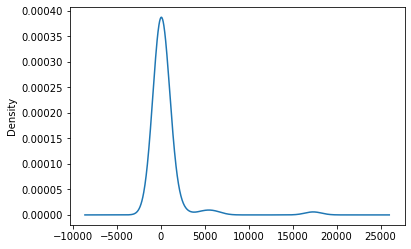

In [1016]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [1017]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts<500].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()



C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [1018]:
# Generate our categorical variable lists
# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes=="object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            7
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [1019]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1020]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1021]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

In [1022]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [990]:
# top_ten_features = [x[-1] for i,x in enumerate(sorted(zip(feature_importances,features), reverse=True))
#                    if i < 20]

# top_ten_features

In [1023]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
# hidden_nodes_layer3 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)
# nn.add(
#     tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
# )
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 20)                880       
_________________________________________________________________
dense_266 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 11        
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [1024]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_2/",exist_ok=True)
checkpoint_path = "checkpoints_2/AlphabetSoupCharity_Optimization.{epoch:02d}.hdf5"

In [1025]:

opt = tf.keras.optimizers.Adam(learning_rate=0.001)


In [1026]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [1027]:
# Train the model
fit_model = nn.fit(X_train,y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 616us/step - loss: 0.6266 - accuracy: 0.6662
Epoch 2/100
156/804 [====>.........................] - ETA: 0s - loss: 0.5770 - accuracy: 0.7184
Epoch 00002: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.02.hdf5
804/804 [==============================] - 1s 632us/step - loss: 0.5663 - accuracy: 0.7264
Epoch 3/100
312/804 [==========>...................] - ETA: 0s - loss: 0.5556 - accuracy: 0.7307
Epoch 00003: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.03.hdf5
804/804 [==============================] - 1s 636us/step - loss: 0.5568 - accuracy: 0.7293
Epoch 4/100
583/804 [====================>.........] - ETA: 0s - loss: 0.5523 - accuracy: 0.7332
Epoch 00004: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.04.hdf5
804/804 [==============================] - 0s 620us/step - loss: 0.5526 - accuracy: 0.7326
Epoch 5/100
735/804 [==========================>...] - ETA: 0s - loss: 0.5557 - a

804/804 [==============================] - 1s 631us/step - loss: 0.5420 - accuracy: 0.7349
Epoch 36/100
804/804 [==============================] - 0s 578us/step - loss: 0.5412 - accuracy: 0.7374
Epoch 37/100
  1/804 [..............................] - ETA: 0s - loss: 0.4464 - accuracy: 0.8438
Epoch 00037: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.37.hdf5
804/804 [==============================] - 0s 620us/step - loss: 0.5446 - accuracy: 0.7312
Epoch 38/100
170/804 [=====>........................] - ETA: 0s - loss: 0.5483 - accuracy: 0.7275
Epoch 00038: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.38.hdf5
804/804 [==============================] - 1s 623us/step - loss: 0.5409 - accuracy: 0.7357
Epoch 39/100
429/804 [===============>..............] - ETA: 0s - loss: 0.5400 - accuracy: 0.7367
Epoch 00039: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.39.hdf5
804/804 [==============================] - 0s 615us/step - loss: 0.5394 - acc

511/804 [==================>...........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7457
Epoch 00070: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.70.hdf5
804/804 [==============================] - 0s 611us/step - loss: 0.5342 - accuracy: 0.7433
Epoch 71/100
653/804 [=======================>......] - ETA: 0s - loss: 0.5412 - accuracy: 0.7350
Epoch 00071: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.71.hdf5
804/804 [==============================] - 1s 650us/step - loss: 0.5407 - accuracy: 0.7356
Epoch 72/100
804/804 [==============================] - 1s 669us/step - loss: 0.5416 - accuracy: 0.7347
Epoch 73/100
 82/804 [==>...........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7365
Epoch 00073: saving model to checkpoints_2/AlphabetSoupCharity_Optimization.73.hdf5
804/804 [==============================] - 1s 667us/step - loss: 0.5363 - accuracy: 0.7385
Epoch 74/100
246/804 [========>.....................] - ETA: 0s - loss: 0.5360 - accuracy:

In [1028]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.3336 - accuracy: 0.7080
Loss: 1.3335834741592407, Accuracy: 0.7079883217811584


In [1029]:
acuracy = pd.DataFrame(fit_model.history)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f81a2f97400>,
      dtype=object)

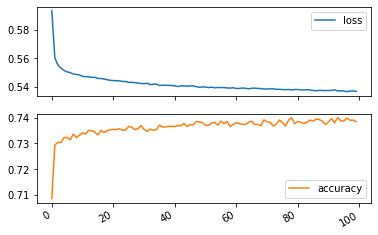

In [1030]:
acuracy.plot(subplots=True)

## Restoring weights 

In [1031]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints_2/AlphabetSoupCharity_Optimization.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.3004 - accuracy: 0.7106
Loss: 1.3003654479980469, Accuracy: 0.7105539441108704
